In [ ]:
"""
https://zhuanlan.zhihu.com/p/149283275
中心极限定理：中心极限定理说明，在适当的条件下，
大量相互独立随机变量的均值经适当标准化后依分布收敛于标准正态分布。
"""

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skewnorm

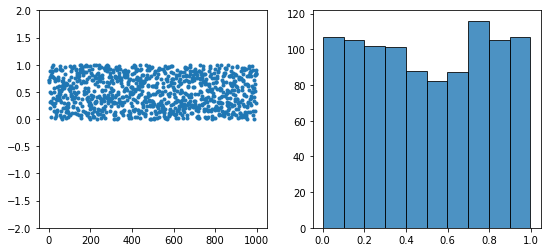

mean: 0.5 , std: 0.3


In [10]:
X = np.random.rand(1000)

fig, (axs1, axs2) = plt.subplots(1,2,figsize = (9,4))

axs1.plot(X, '.')
axs1.set_ylim(-2,2)

axs2.hist(X, edgecolor = 'k', alpha = 0.8)
plt.show()

print("mean:",np.round(X.mean(),2), ",","std:", np.round(X.std(),2))

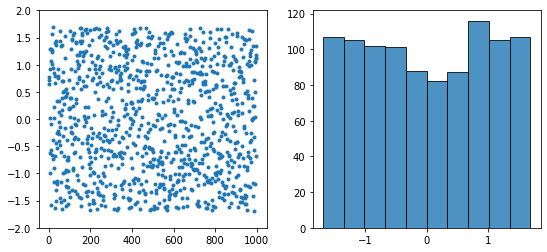

mean: -0.0 std: 1.0


In [12]:
W = (X - X.mean())/X.std()

mean = W.mean()
std_var = W.std()

fig, (axs1, axs2) = plt.subplots(1, 2, figsize=(9, 4))

axs1.plot(W, '.')
axs1.set_ylim(-2, 2)

axs2.hist(W, edgecolor='k', alpha=0.8)
plt.show()

print("mean:", np.round(W.mean(), 2), "std:", np.round(W.std(), 2))

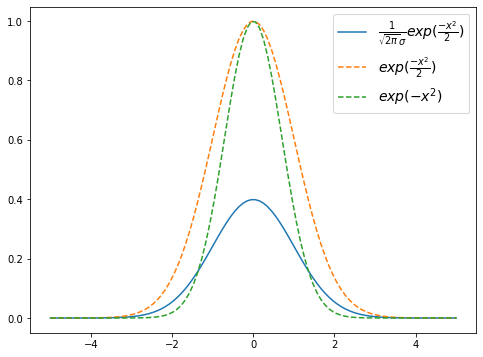

In [13]:
def NormDist(x, mean=0, sigma=1):
    assert(sigma != 0)
    return np.exp(-(x-mean)**2/2)/(np.sqrt(2*np.pi)*sigma)

plt.figure(figsize=(8, 6))

xs = np.linspace(-5, 5, 100)
X = [NormDist(i) for i in xs]
plt.plot(xs, X, '-', label=r'$\frac{1}{\sqrt{2\pi}\sigma}exp(\frac{-x^2}{2})$')

X = [np.exp(-i**2/2) for i in xs]
plt.plot(xs, X, '--', label=r'$exp(\frac{-x^2}{2})$')

X = [np.exp(-i**2) for i in xs]
plt.plot(xs, X, '--', label=r'$exp(-x^2)$')

plt.legend(fontsize=14)
plt.show()

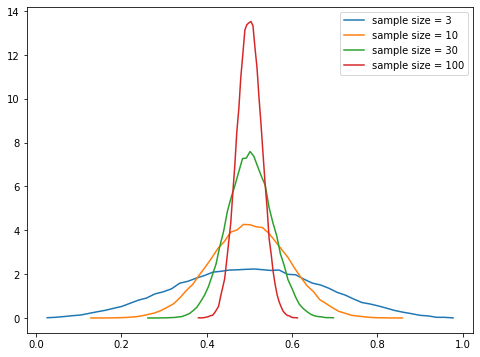

In [18]:
sample_size = [3, 10, 30, 100] # 每次采样个数
number_of_sample = 100000 # 采样次数

plt.figure(figsize=(8,6))

for i, ss in enumerate(sample_size):
    Xs = np.random.rand(number_of_sample, ss)    
    h, b = np.histogram(Xs.mean(axis=1), bins=50, density=True)
    b = (b[:-1] + b[1:]) / 2.
    plt.plot(b, h, '-', label=f'sample size = {ss}')

plt.legend()

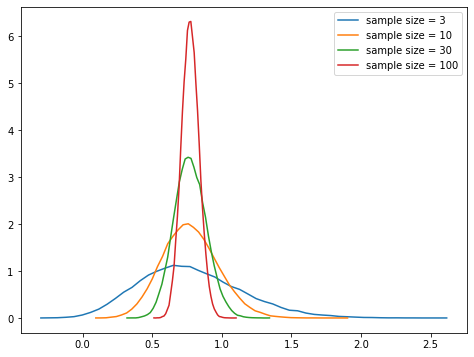

In [21]:
sample_size = [3, 10, 30, 100] # 每次采样个数
number_of_sample = 100000 # 采样次数


plt.figure(figsize=(8,6))

for i, ss in enumerate(sample_size):
    Xs = skewnorm.rvs(4, size=(number_of_sample, ss))
    h, b = np.histogram(Xs.mean(axis=1), bins=50, density=True)
    b = (b[:-1] + b[1:]) / 2.
    plt.plot(b, h, '-', label=f'sample size = {ss}')

plt.legend()